# **CSE655 Homework 1**

### **Part 1: Training a deep feed forward network for multidimensional regression.**




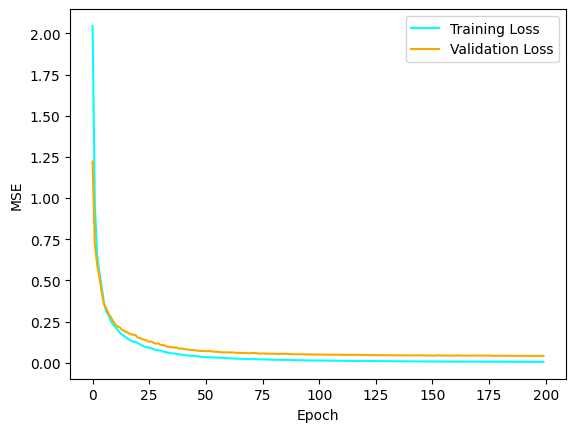

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tf.keras.optimizers import SGD
import matplotlib.pyplot as plt

def function(x):
    x1, x2, x3, x4, x5, x6, x7, x8 = x
    y1 = x1 * x3 + 1.2 * x1 * x5 - x6 * x7 * x8 - 2 * x1**2 * x8 + x5
    y2 = x1 * x5 * x6 - x3 * x4 - 3 * x2 * x3 + 2 * x2**2 * x4 - 2 * x7 * x8 - 1
    y3 = 2 * x3**2 - x5 * x7 - 3 * x1 * x4 * x6 - x1**2 * x2 * x4 - 1
    y4 = -x6**3 + 2 * x1 * x3 * x8 - x1 * x4 * x7 - 2 * x5**2 * x2 * x4 - x8
    y5 = x1**2 * x5 - 3 * x3 * x4 * x8 + x1 * x2 * x4 - 3 * x6 - x1**2 * x7 + 2
    y6 = x1**2 * x3 * x6 - x3 * x5 * x7 + x3 * x4 + 2.2 * x4 + x2**2 * x3 - 2.1
    return [y1, y2, y3, y4, y5, y6]

Nt = 1000
Nv = 1000

np.random.seed(0)

# Training Data
xt = np.random.uniform(-1, 1, (Nt, 8))
yt = np.array([function(x) for x in xt])

# Validation Data
xv = np.random.uniform(-1, 1, (Nv, 8))
yv = np.array([function(x) for x in xv])

# Noise 
noise = np.random.normal(0, 0.001, yt.shape)
yt = yt + noise

model = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(8,)),
    layers.Dense(6, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(6)
])

# Compile
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='mse')

history = model.fit(
    xt, yt,
    epochs = 200,
    validation_data = (xv, yv),
    verbose = 0
)

plt.plot(history.history['loss'], label='Training Loss', color='cyan')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()
